# Kasra Samadi 993623030


# Multi-label Classification with the PriceRunner Dataset

## Task Overview
In this exercise, you will develop a multi-label classification model to classify products into multiple categories based on their 'Product Title' and 'Cluster Label'. The target variable for classification will be 'Category Label'.

Your task includes selecting the right features, preprocessing the data, implementing a multi-label classification model, and evaluating its performance.

Complete the sections marked `# TODO` and run each cell to see the output of your code.



## Step 1: Data Loading
Load the dataset into a Pandas DataFrame.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
dataset = pd.read_csv('Dataset\\pricerunner_aggregate.csv')
dataset

,Product ID,Product Title,Merchant ID,Cluster ID,Cluster Label,Category ID,Category Label
0,1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
...,...,...,...,...,...,...,...
35306,47350,smeg fab28 60cm retro style right hand hinge f...,59,47517,Smeg FAB28 Cream,2623,Fridges
35307,47351,smeg fab28 60cm retro style left hand hinge fr...,59,47518,Smeg FAB28 Red,2623,Fridges
35308,47352,smeg fab28 60cm retro style left hand hinge fr...,59,47519,Smeg FAB28 Pink,2623,Fridges
35309,47355,candy 60cm built under larder fridge cru160nek,125,47524,Candy CRU16.0,2623,Fridges


In [3]:
print(dataset.isna().sum())

Product ID         0
Product Title      0
 Merchant ID       0
 Cluster ID        0
 Cluster Label     0
 Category ID       0
 Category Label    0
dtype: int64


In [4]:
value_counts = dataset[" Category Label"].value_counts()
print(value_counts)
value_counts = dataset[" Category ID"].value_counts()
print(value_counts)
value_counts = dataset[" Cluster ID"].value_counts()
print(value_counts)

Fridge Freezers     5501
Mobile Phones       4081
Washing Machines    4044
CPUs                3862
Fridges             3584
TVs                 3564
Dishwashers         3424
Digital Cameras     2697
Microwaves          2342
Freezers            2212
Name:  Category Label, dtype: int64
2622    5501
2612    4081
2620    4044
2615    3862
2623    3584
2614    3564
2619    3424
2617    2697
2618    2342
2621    2212
Name:  Category ID, dtype: int64
38848    27
4419     24
38849    24
1        23
4425     23
         ..
41460     1
41461     1
41462     1
41463     1
47525     1
Name:  Cluster ID, Length: 13233, dtype: int64



## Step 2: Data Preprocessing
Preprocess the 'Product Title' and 'Cluster Label' features and encode the 'Category Label'.


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
X = dataset[['Product Title',' Cluster Label']]
y = dataset[' Category Label']
X = X.copy()
X['Product Title _ Cluster Label'] = X['Product Title'] + ' ' + X[' Cluster Label']

x_train, x_test, y_train, y_test = train_test_split( X['Product Title _ Cluster Label'], y, 
                                                    test_size=0.2, random_state=4)

vectorizer = CountVectorizer()
# Preprocess the train data using CountVectorizer
train_features = vectorizer.fit_transform(x_train)
# Preprocess the test data using CountVectorizer
test_features = vectorizer.transform(x_test)


## Step 3: Model Training
Implement and train a multi-label classification model.


In [6]:
# TODO: Implement and train the model
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

# Create a Naive Bayes classifier
classifier = MultinomialNB()
# Train the classifier
classifier.fit(train_features, y_train)

# predictions on test_features
y_pred = classifier.predict(test_features)


## Step 4: Model Evaluation
Evaluate the model using appropriate multi-label classification metrics.


In [7]:
# TODO: Evaluate the model
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix
print("accuracy score for x test prediction: ", accuracy_score(y_test, y_pred))
print("f1 score for x test prediction: ", f1_score(y_test, y_pred, average='weighted'))
print("recall score for x test prediction: ", recall_score(y_test, y_pred, average='weighted'))
print("precision score for x test prediction: ", precision_score(y_test, y_pred, average='weighted'))

accuracy score for x test prediction:  0.970975506158856
f1 score for x test prediction:  0.9708944339099052
recall score for x test prediction:  0.970975506158856
precision score for x test prediction:  0.971506677899927



### confusion_matrix with y_test and y_pred

<AxesSubplot:>

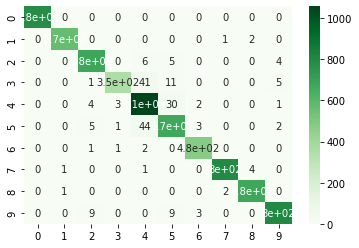

In [8]:
con_matrix=confusion_matrix(y_test, y_pred)
sns.heatmap(con_matrix,annot=True, cmap="Greens")

### save to csv

In [9]:
y_pred_df = pd.DataFrame(y_pred,columns=['Category Label'])
y_pred_df.to_csv("Q2.csv",index=False)